# Continuous Glucose Monitoring Data Analysis Using *glucoCheck* Package

To begin with you will have to check if **python** and all the relevant packages are installed on your machine.
Detailed list, including how to install, can be accessed from the documentation page : https://snehg0205.github.io/index.html#chp1

The *glucoCheck* package can be downloaded from: XXXXXXXXXXXXXXXXXXXXXX, which will have to be explicitly imported.
Below we will be using publically available dataset from Hall et al. paper ( https://doi.org/10.1371/journal.pbio.2005143 ) to illustrate the performance of the package. This continuous glucose monitoring (CGM) data consists of 105426 glucose reading taken every 5min across 57 individuals, for convenience this data is readily available as part of the *glucoCheck* package and for simplicity we call it Hall dataset. 

In [1]:
from GlucoCheck.glucoCheck import glucoCheckOps # to load glucoCheck package
import pandas as pd # to load pandas for convenient data manipulation

glucoCheckObject = glucoCheckOps()

Using TensorFlow backend.


### Reading-in data
Hall data can be accessed directly by loading it from the package. Below you will load data that was already organised into three columns (*subjectID*, *displayTime*, *glucoseValue*) for you. Column order is fixed within the package and impotant for downstream analysis, however you can have columns named alternatively. 

To load this dataset, use the following command:

In [2]:
data = glucoCheckObject.hall_data
data['Display Time'] = pd.to_datetime(data['Display Time']) # Ensures that displayTime column 
# is converted to datetime format.
data['GlucoseValue'] = pd.to_numeric(data['GlucoseValue'])# Ensures that gluvoseValue is numeric
data.head() # this allows you to peek at loaded data; or type just data to see first and last portion of your dataset

,subjectId,Display Time,GlucoseValue
0,1636-69-001,2014-02-03 03:42:00,93
1,1636-69-001,2014-02-03 03:47:00,93
2,1636-69-001,2014-02-03 03:52:00,93
3,1636-69-001,2014-02-03 03:57:00,95
4,1636-69-001,2014-02-03 04:02:00,96


Alternativerly you can download Hall data from the original source (https://doi.org/10.1371/journal.pbio.2005143 ), save it in your working directory/folder and load it using *pd.read_csv(...)* command. You would be using this method to start the analysis of your own dataset. (Do not forget to modify the path given between the "..."). 

In [3]:
#data = pd.read_csv("/Users/zurauskj/Downloads/Data/Hall/Hall_data.csv")
#data['displayTime'] = pd.to_datetime(data['displayTime']) # Ensures that displayTime column 
# is converted to datetime format.
#data['glucoseValue'] = pd.to_numeric(data['glucoseValue'])# Ensures that gluvoseValue is numeric
# data.head()  # this allows you to peek at loaded data

One of the first steps is to check how many subjects we have in this datasets, and what are they IDs. To do so, you can use *unique(...)* and *len(...)* commands: 

In [4]:
IDs = data.subjectId.unique()
print("Number of subjects is:", len(IDs))

print("Subject IDs are:", IDs)

Number of subjects is: 57
Subject IDs are: ['1636-69-001' '1636-69-026' '1636-69-028' '1636-69-032' '1636-69-035'
 '1636-69-048' '1636-69-053' '1636-69-060' '1636-69-064' '1636-69-069'
 '1636-69-090' '1636-69-091' '1636-69-100' '1636-69-104' '1636-69-107'
 '1636-69-111' '1636-69-114' '1636-69-123' '1636-70-1002' '1636-70-1003'
 '1636-70-1005' '1636-70-1008' '1636-70-1010' '2133-001' '2133-002'
 '2133-003' '2133-004' '2133-006' '2133-007' '2133-008' '2133-009'
 '2133-010' '2133-011' '2133-012' '2133-013' '2133-015' '2133-017'
 '2133-018' '2133-019' '2133-020' '2133-021' '2133-022' '2133-023'
 '2133-024' '2133-025' '2133-026' '2133-027' '2133-028' '2133-030'
 '2133-032' '2133-033' '2133-035' '2133-036' '2133-037' '2133-039'
 '2133-040' '2133-041']


We can visualise individual glucose timeseries by plotting their trace plots; simply enter subject's ID in the quotes below

Displaying for all days 


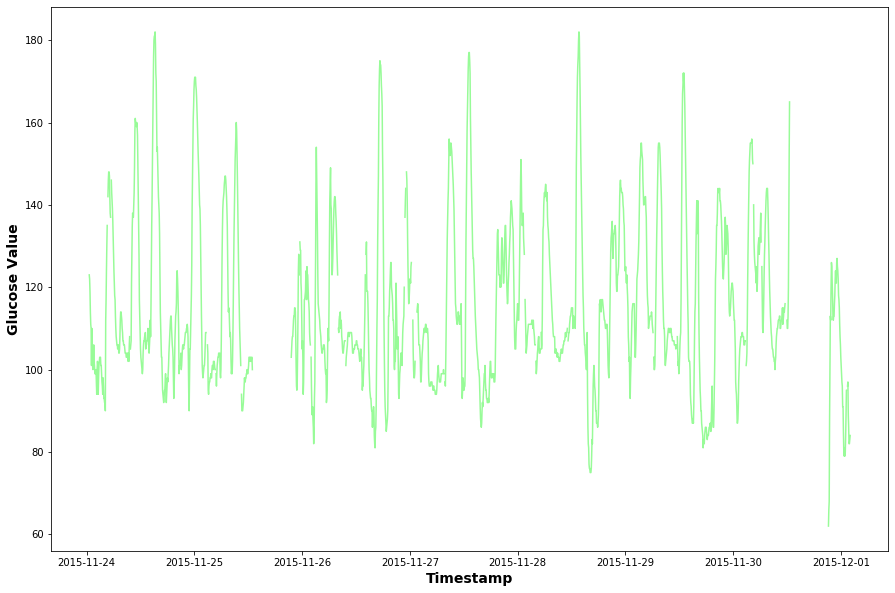

In [5]:
glucoCheckObject.plotIndividual('1636-69-026',data)

To visualise glucose trace plots for individual day use the same command with subject's ID and additionally add specific day in the quotes, e.g.:

Displaying for day: 2015-11-27


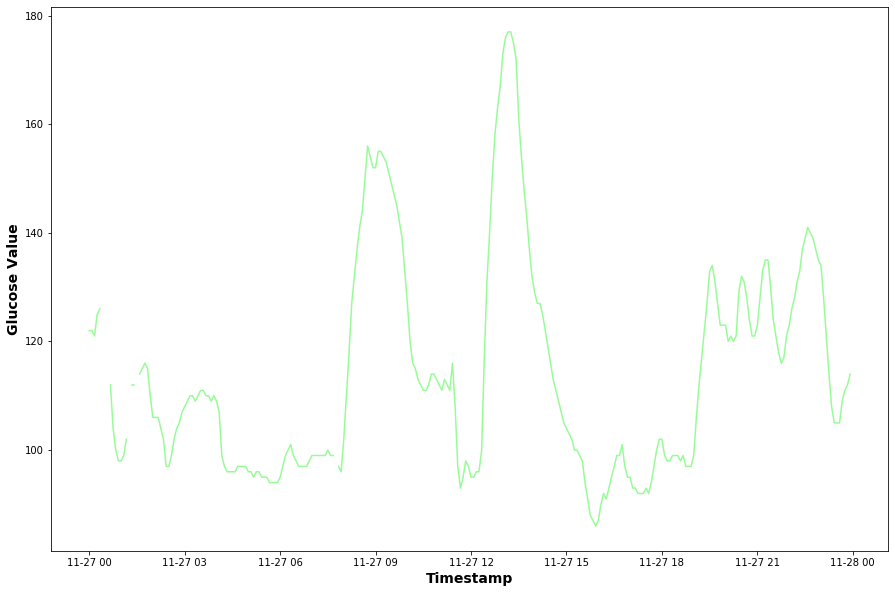

In [6]:
glucoCheckObject.plotIndividual('1636-69-026', data, '2015-11-27')

### Initial data inspection and visualisation
To understand the overall data quality we need to inspect the data, this will help with data quality control. By using the following *dataDecribe(...)* command, we can extract a table that provides a number of quality measures for each subject. Using this information we can quickly assess the overall "goodness" of the dataset:

In [7]:
QC_table = glucoCheckObject.dataDescribe(data)
#QC_table.head(5) # type to view the first 5 rows (individuals) of the data description
QC_table # to see full table

,Subject ID,Start,End,# of readings,# of days,Timestamp days,# of missing values,% of missing values,Avg gap size,Max gv,Min gv,Mean gv
0,2133-041,2017-07-03 18:32:00,2017-07-11 20:41:00,1858,8.08,8 days 02:04:00,490,21.04,28.82,204,51,108.56
1,2133-040,2017-06-28 13:34:00,2017-07-05 00:19:00,1792,6.42,6 days 10:40:00,100,5.39,2.94,171,59,92.59
2,2133-039,2017-06-05 12:23:00,2017-06-14 13:57:00,2013,9.04,9 days 01:29:00,733,28.09,5.51,204,50,103.92
3,2133-037,2017-06-05 14:11:00,2017-06-11 21:50:00,1785,6.29,6 days 07:34:00,57,3.13,2.71,153,48,92.97
4,2133-036,2017-06-01 15:26:00,2017-06-10 06:31:00,1954,8.62,8 days 15:00:00,651,26.21,5.47,214,58,107.53
5,2133-035,2017-06-01 17:17:00,2017-06-08 23:06:00,1830,7.21,7 days 05:44:00,327,15.68,4.81,190,47,101.77
6,2133-033,2017-05-19 12:58:00,2017-05-26 20:02:00,1892,7.25,7 days 06:59:00,237,11.29,8.78,161,49,92.98
7,2133-032,2017-05-19 13:31:00,2017-05-25 18:05:00,1781,6.17,6 days 04:29:00,8,0.45,1.60,147,69,99.48
8,2133-030,2017-05-03 14:13:00,2017-05-10 08:57:00,1818,6.75,6 days 18:39:00,144,7.38,18.00,147,41,93.20
9,2133-028,2017-05-10 00:03:00,2017-05-17 02:08:00,1850,7.08,7 days 02:00:00,195,9.56,65.00,111,45,74.79


To save the above table as a *csv*, use the following *.to_csv()* command; however do not forget to replace the  path, given in-between '...', with your own:

In [8]:
# QC_table.to_csv('~/Desktop/QC_table.csv')

It is convenient to sort the *QC_table* by column of choice, to do this simply set the column name in the quotes as given below. Here we sort it by the *% of missing val.*,

In [9]:
QC_table.sort_values('% of missing values', ascending=False) 

,Subject ID,Start,End,# of readings,# of days,Timestamp days,# of missing values,% of missing values,Avg gap size,Max gv,Min gv,Mean gv
56,1636-69-001,2014-02-03 03:42:00,2015-04-02 15:08:00,1846,423.46,423 days 11:21:00,120125,98.50,15015.62,250,64,108.23
50,1636-69-053,2015-05-07 18:34:00,2016-03-01 20:06:00,1867,299.04,299 days 01:27:00,84299,97.87,2479.38,183,43,100.84
44,1636-69-100,2015-09-15 00:03:00,2016-03-08 02:14:00,1880,175.08,175 days 02:06:00,48585,96.35,1313.11,153,41,97.40
43,1636-69-104,2015-08-05 14:46:00,2016-02-23 09:10:00,2361,201.75,201 days 18:19:00,55925,96.24,317.76,152,46,89.69
34,1636-70-1010,2016-03-02 15:29:00,2016-05-30 12:43:00,1820,88.88,88 days 21:09:00,23806,93.00,915.62,186,54,113.98
54,1636-69-028,2015-04-02 13:33:00,2015-06-16 21:18:00,1822,75.29,75 days 07:40:00,19900,91.74,737.04,216,55,115.39
47,1636-69-069,2015-07-20 13:33:00,2015-08-12 05:21:00,1897,22.62,22 days 15:43:00,4691,71.90,76.90,187,69,108.58
41,1636-69-111,2015-09-15 03:41:00,2015-10-06 04:00:00,1868,21.00,21 days 00:14:00,4207,69.53,191.23,135,0,99.18
23,2133-012,2017-01-11 14:49:00,2017-01-24 01:03:00,1935,12.42,12 days 10:09:00,1658,46.34,127.54,148,49,96.02
52,1636-69-035,2016-01-27 00:02:00,2016-02-07 01:06:00,2180,11.00,11 days 00:59:00,1061,33.37,17.98,234,69,116.56


From this table above, we see that the individual 1636-69-001 has an extremely large gap. We can use the following command to split that individual's data into two parts.

Alternatively,this command can also be used to split an individual we wish to impute when the gap size is way to large.

In [10]:
individual = data.copy()
individual = individual[individual['subjectId']=='1636-69-001']
split_1, split_2 =  glucoCheckObject.splitIndividual(individual,100)

In [11]:
split_1

,subjectId,Display Time,GlucoseValue
0,1636-69-001,2014-02-03 03:42:00,93
1,1636-69-001,2014-02-03 03:47:00,93
2,1636-69-001,2014-02-03 03:52:00,93
3,1636-69-001,2014-02-03 03:57:00,95
4,1636-69-001,2014-02-03 04:02:00,96
...,...,...,...
749,1636-69-001,2014-02-05 18:11:00,98
750,1636-69-001,2014-02-05 18:16:00,99
751,1636-69-001,2014-02-05 18:21:00,99
752,1636-69-001,2014-02-05 18:26:00,100


In [12]:
split_2

,subjectId,Display Time,GlucoseValue
0,1636-69-001-2,2015-03-29 11:53:00,100
1,1636-69-001-2,2015-03-29 11:58:00,111
2,1636-69-001-2,2015-03-29 12:03:00,113
3,1636-69-001-2,2015-03-29 12:08:00,114
4,1636-69-001-2,2015-03-29 12:13:00,116
...,...,...,...
1087,1636-69-001-2,2015-04-02 14:48:00,115
1088,1636-69-001-2,2015-04-02 14:53:00,114
1089,1636-69-001-2,2015-04-02 14:58:00,117
1090,1636-69-001-2,2015-04-02 15:03:00,121


It is convenient to visualise these results by plotting histograms and/or bar plots; you can do so by using *glucoCheckObject.histograms(...)* and *glucoCheckObject.barplots(...)* commands. First specify the table name and then the name of column of interest. We illustrate this using column called  *# of days*

As you can see from plots above and sorted table, we can immediately identify individual time series that require special treatment. Although we sorted by the *% of missing val.*, we can also see that ~ top 8 individuals not only have high number of readings missing but their time series span over several months and/or years (see columns: *Start*, *End*, *# of days*). This suggest that we need to inspect these particular individuals more closely.

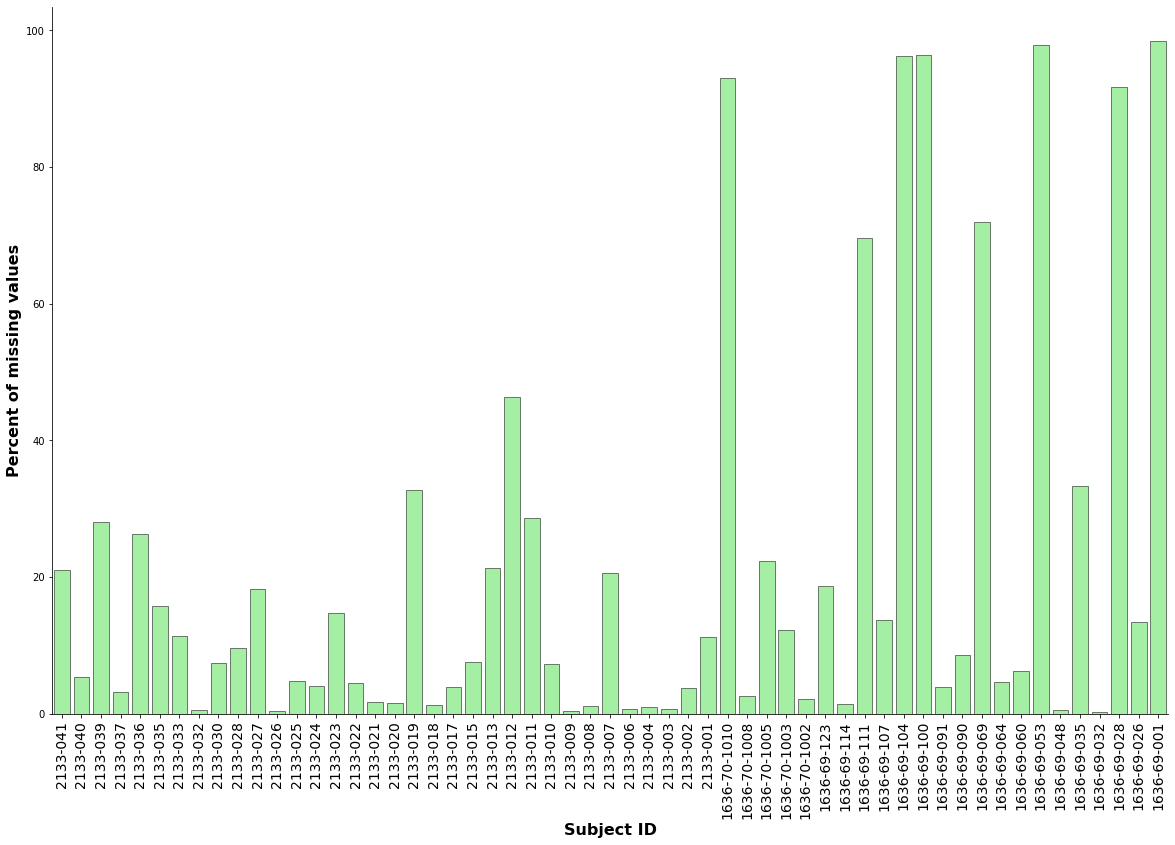

In [13]:
glucoCheckObject.barplots(QC_table, '% of missing values')

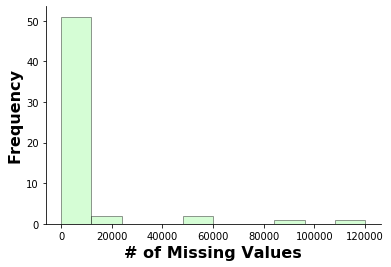

In [14]:
glucoCheckObject.histograms(QC_table, '# of missing values')

#### To save the plots, pass 1 after the name of the plot

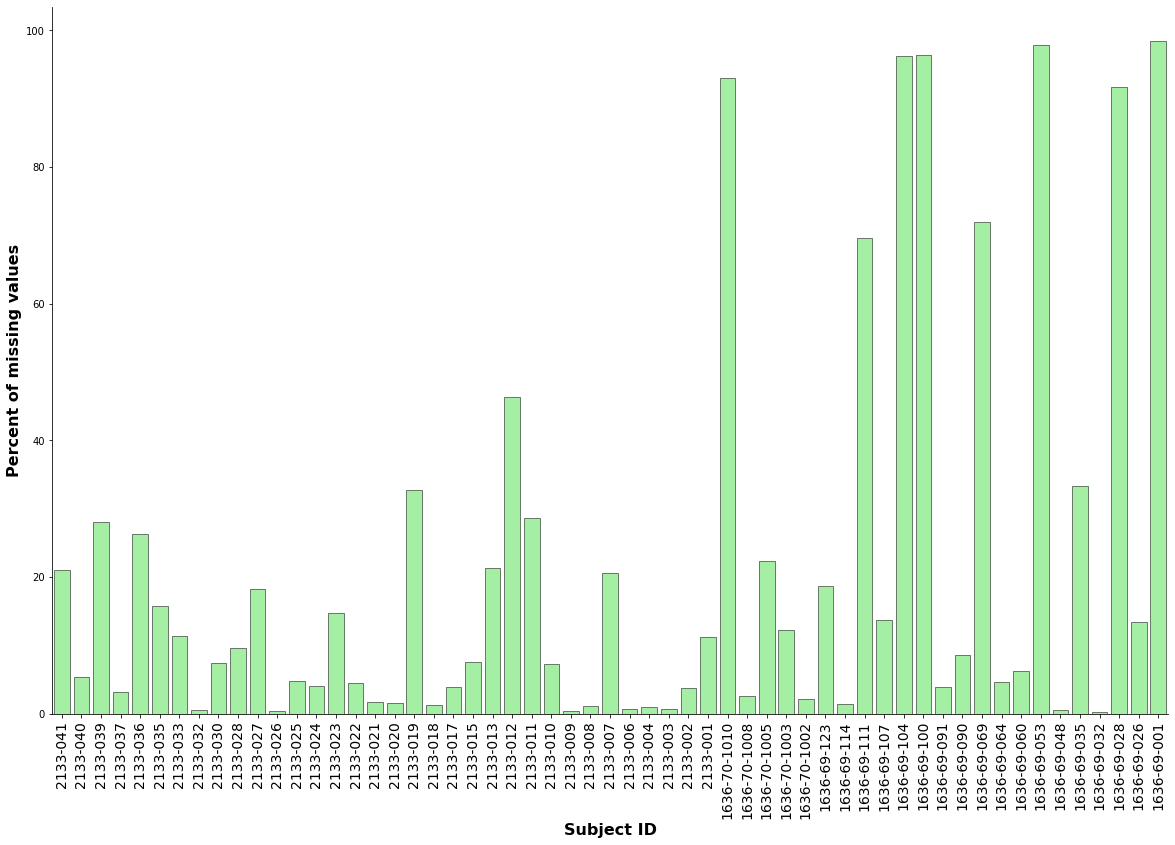

In [15]:
glucoCheckObject.barplots(QC_table, '% of missing values', 1)

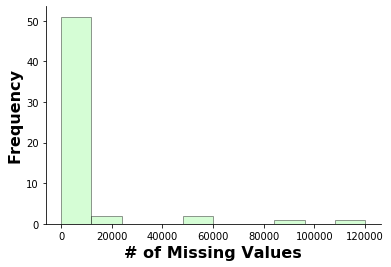

In [16]:
glucoCheckObject.histograms(QC_table, '# of missing values',1)

### Calculating the variability indices
We calculate the following variability indices for all individuals:
- ADRR
- BGRI
- CONGAn
- Distance Travelled
- Estimated hbA1c
- GFI
- GLI
- GMI
- GRADE
- GVP
- IGC
- J - Index
- LAGE
- M - Value
- MAD
- MAG
- MAGE
- MODD
- PGS
- SD of ROC
- Summary Statistics
- Time in Range
- Variability Episodes



In [17]:
gvi = glucoCheckObject.gvIndices(data)
display(gvi)

,ADDR,BGRI,LBGI,HBGI,CONGA1,CONGA2,CONGA4,DT,HBA1C,GFI,...,MIN,TAR_VH(%),TAR_H(%),TIR(%),TBR_L(%),TBR_VL(%),Hypoglycemic Episodes,Hyperglycemic Episodes,MAGE,MAGE Daily
Subject ID,,,,,,,,,,,,,,,,,,,,,
1636-69-001,17.58,1.67,0.71,0.97,0.01,0.01,0.01,4319.0,5.60,4.62,...,64,0.000,3.305,96.624,0.070,0.000,0,0,114.379,0.272
1636-69-026,11.54,0.96,0.36,0.60,3.88,4.15,3.65,4254.0,5.65,4.89,...,62,0.000,0.134,99.665,0.201,0.000,0,0,111.589,27.897
1636-69-028,6.50,0.99,0.64,0.35,0.05,0.06,0.08,3625.0,5.42,4.08,...,75,0.000,0.000,100.000,0.000,0.000,0,0,103.787,1.422
1636-69-032,7.21,0.74,0.60,0.14,2.67,3.53,3.82,3986.0,5.36,4.03,...,67,0.000,0.000,99.931,0.069,0.000,0,0,97.644,32.548
1636-69-035,10.71,1.44,0.63,0.81,1.76,2.76,2.77,4667.0,5.65,5.30,...,69,0.000,0.414,99.379,0.207,0.000,0,0,123.271,15.409
1636-69-048,8.89,1.44,1.42,0.02,2.78,3.44,3.94,3425.0,5.00,3.37,...,63,0.000,0.000,99.233,0.767,0.000,0,0,101.074,33.691
1636-69-053,10.82,1.42,1.19,0.23,3.22,3.89,4.16,3683.0,5.13,3.51,...,66,0.000,0.114,99.543,0.342,0.000,0,0,96.703,19.341
1636-69-060,5.82,0.87,0.08,0.79,2.42,2.76,2.92,3636.0,5.94,3.47,...,91,0.000,0.061,99.939,0.000,0.000,0,0,124.283,31.071
1636-69-064,12.82,1.16,0.43,0.73,4.83,5.19,5.35,4789.0,5.67,5.11,...,78,0.000,1.363,98.637,0.000,0.000,0,0,122.189,40.730


### Imputing the individual with the gap

###### Case 1: Gap of more than 15 values and less than 50 values


In [18]:
dataWithMissing = pd.read_csv('~/Desktop/NCSA_genomics/Python Files/Files/testfile_LSTM.csv')
imputed_1 = glucoCheckObject.impute(dataWithMissing)

Gap < 50; We use LSTM imputations
Training Model...

Model trained successfully!
Imputation Successful


###### Case 2: Gap of less than 5 values 


In [19]:
dataWithMissing = pd.read_csv('~/Desktop/NCSA_genomics/Python Files/Files/testfile_LINEAR.csv')
imputed_2 = glucoCheckObject.impute(dataWithMissing)

Gap < 5; We use the linear imputations
Imputation Successful


###### Case 3: Gap of more than 5 values and less than 15 values


In [20]:
dataWithMissing = pd.read_csv('~/Desktop/NCSA_genomics/Python Files/Files/testfile_SPLINE.csv')
imputed_3 = glucoCheckObject.impute(dataWithMissing)

Gap < 15; We use the spline imputations
Imputation Successful


##### Viewing the imputed data

In [21]:
imputed_1

,subjectId,Display Time,GlucoseValue
0,1636-69-032,1/13/16 12:58,122.0
1,1636-69-032,1/13/16 13:03,122.0
2,1636-69-032,1/13/16 13:08,122.0
3,1636-69-032,1/13/16 13:13,123.0
4,1636-69-032,1/13/16 13:18,124.0
...,...,...,...
1778,1636-69-032,1/19/16 17:12,101.0
1779,1636-69-032,1/19/16 17:17,98.0
1780,1636-69-032,1/19/16 17:22,101.0
1781,1636-69-032,1/19/16 17:27,106.0


### Classifying the individual as diabetic, prediabetic or non-diabetic

Confusion Matrix:



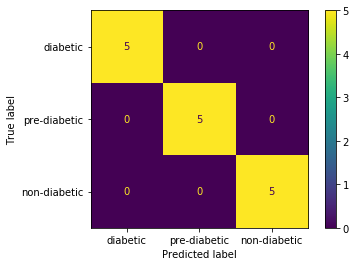

In [22]:
label = glucoCheckObject.classifier(imputed_3)


In [23]:
label = glucoCheckObject.classifier(imputed_3)
print("The individual is "+str(label[0]))

The individual is pre-diabetic


### Trimming the data
As we see, our data starts and ends in the middle of the day. We can use the following command to make sure our individuals have only full days in their data.

In [24]:
fullDays = glucoCheckObject.fullDaysOnly(imputed_1)
fullDays

,subjectId,Display Time,GlucoseValue
0,1636-69-032,2016-01-14 00:03:00,121.0
1,1636-69-032,2016-01-14 00:08:00,121.0
2,1636-69-032,2016-01-14 00:13:00,121.0
3,1636-69-032,2016-01-14 00:18:00,122.0
4,1636-69-032,2016-01-14 00:23:00,122.0
...,...,...,...
1434,1636-69-032,2016-01-18 23:37:00,136.0
1435,1636-69-032,2016-01-18 23:42:00,126.0
1436,1636-69-032,2016-01-18 23:47:00,132.0
1437,1636-69-032,2016-01-18 23:52:00,135.0
